### Load the data

In [1]:
import pandas as pd
#column name
column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'label']

# Load the text file into a DataFrame
df = pd.read_csv('coursework.txt', delimiter=' ', names=column_names)

In [2]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [3]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pelvic_incidence            310 non-null    float64
 1   pelvic_tilt                 310 non-null    float64
 2   lumbar_lordosis_angle       310 non-null    float64
 3   sacral_slope                310 non-null    float64
 4   pelvic_radius               310 non-null    float64
 5   grade_of_spondylolisthesis  310 non-null    float64
 6   label                       310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


### EDA

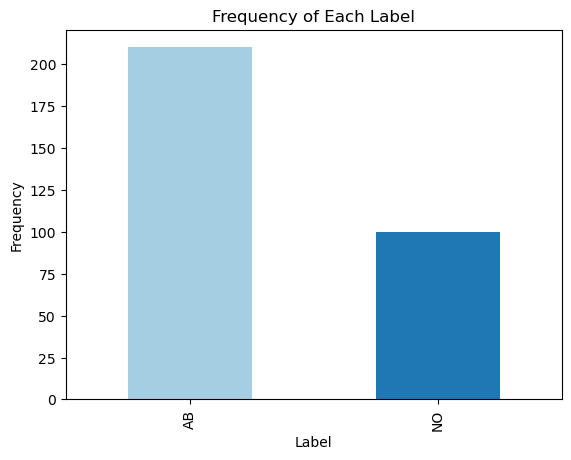

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visulaize the distribution
df["label"].value_counts().sort_index().plot.bar(color=plt.cm.Paired.colors)

# Setting the title and labels
plt.title('Frequency of Each Label')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

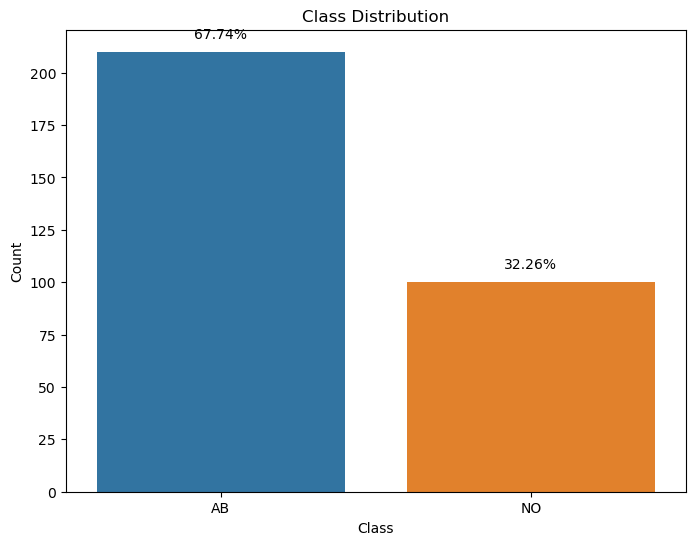

In [6]:
#Identify class imbalance


plt.figure(figsize=(8, 6))
y=df['label']
# Plot a countplot
sns.countplot(x=y)

# Calculate percentage values
total_samples = len(y)
class_counts = y.value_counts()
percentage_values = [f'{count / total_samples * 100:.2f}%' for count in class_counts]

# Annotate the countplot with percentage values
for i, count in enumerate(class_counts):
    plt.text(i, count + 5, percentage_values[i], ha='center', va='bottom')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

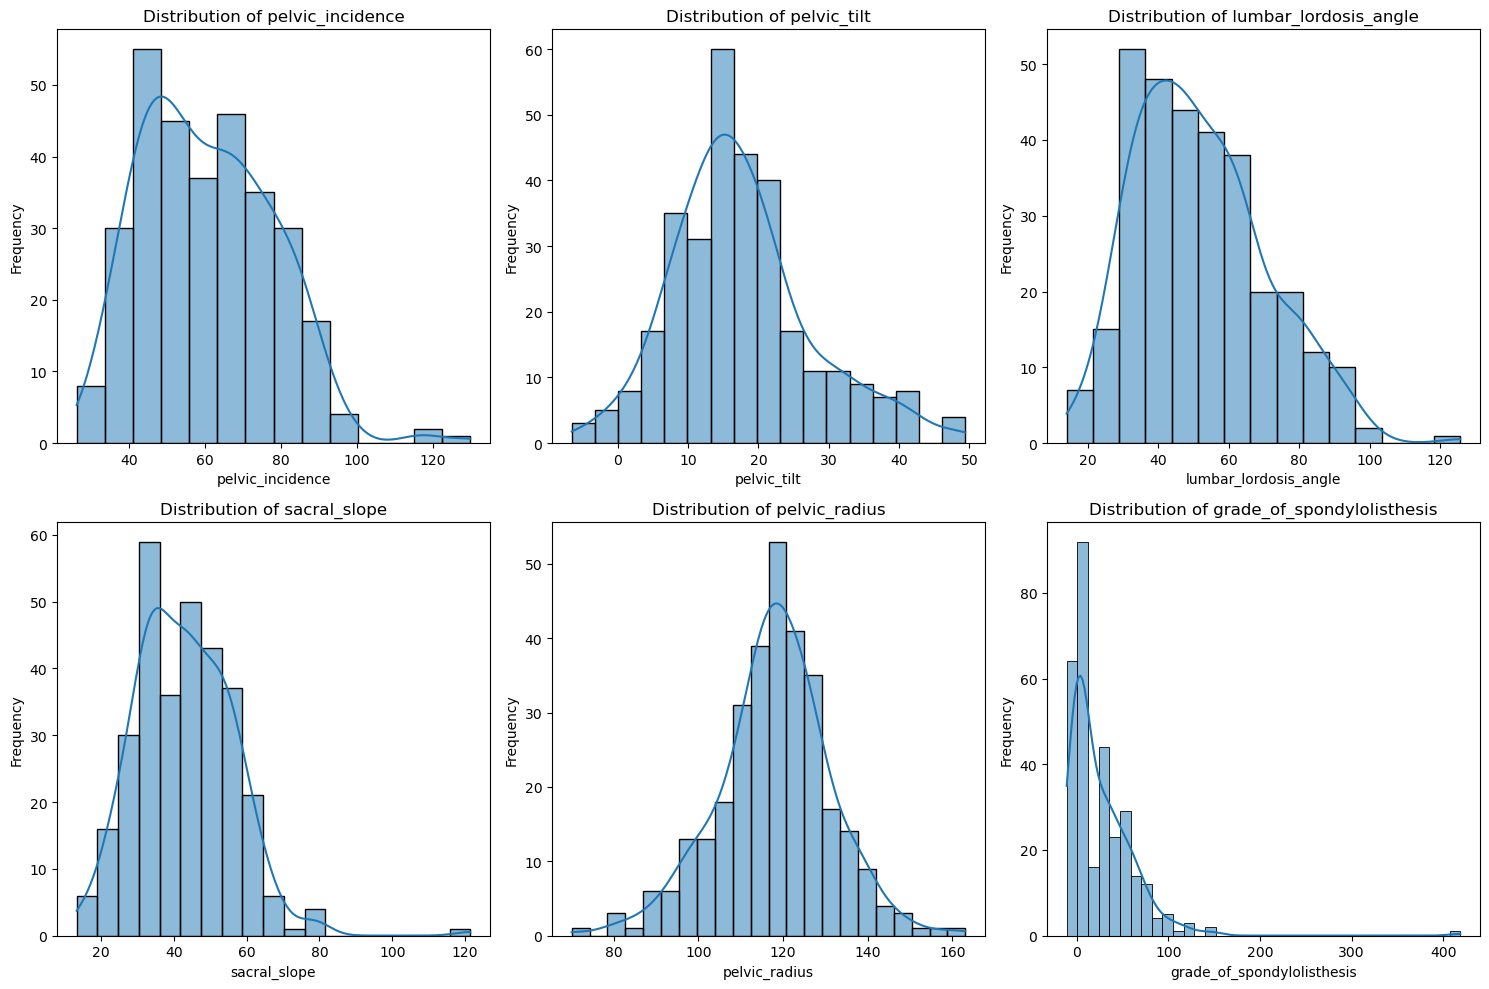

In [7]:
# Plot distribution of each variable 

numerical_columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope',
                     'pelvic_radius', 'grade_of_spondylolisthesis']
# Set up the matplotlib figure with a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plotting each column on a subplot
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

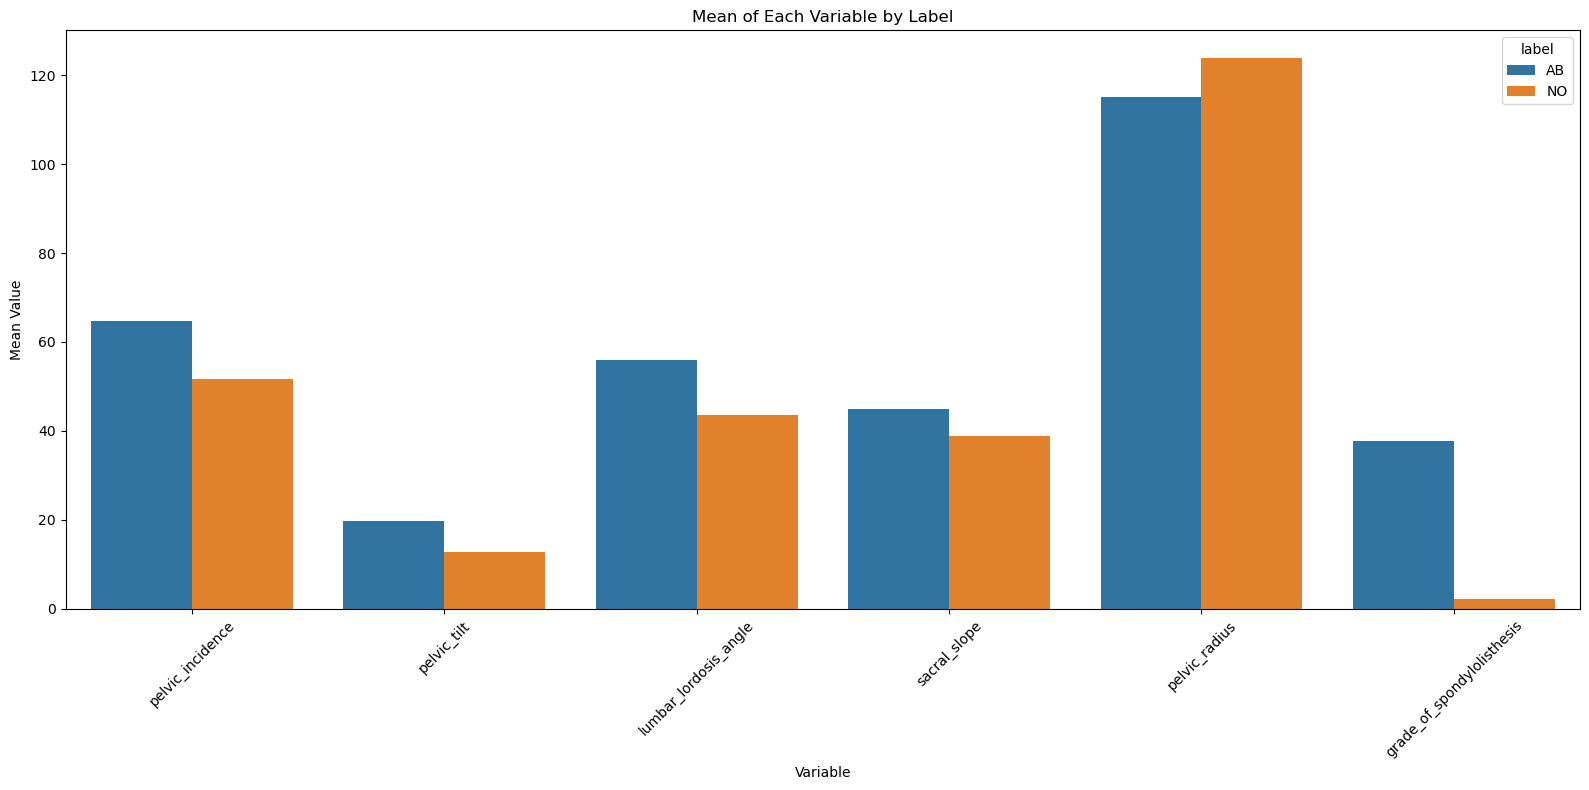

In [8]:
#plot distribution of each variable against label.

df_grouped = df.groupby("label").agg("mean")

# Reset index to make 'label' a column again, to allow the melt
df_grouped = df_grouped.reset_index()

# Melting the DataFrame
melted_df = pd.melt(df_grouped, id_vars=["label"], var_name="variable", value_name="mean")

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(x='variable', y='mean', hue='label', data=melted_df)
plt.xticks(rotation=45)
plt.title('Mean of Each Variable by Label')
plt.ylabel('Mean Value')
plt.xlabel('Variable')
plt.tight_layout()  
plt.show()

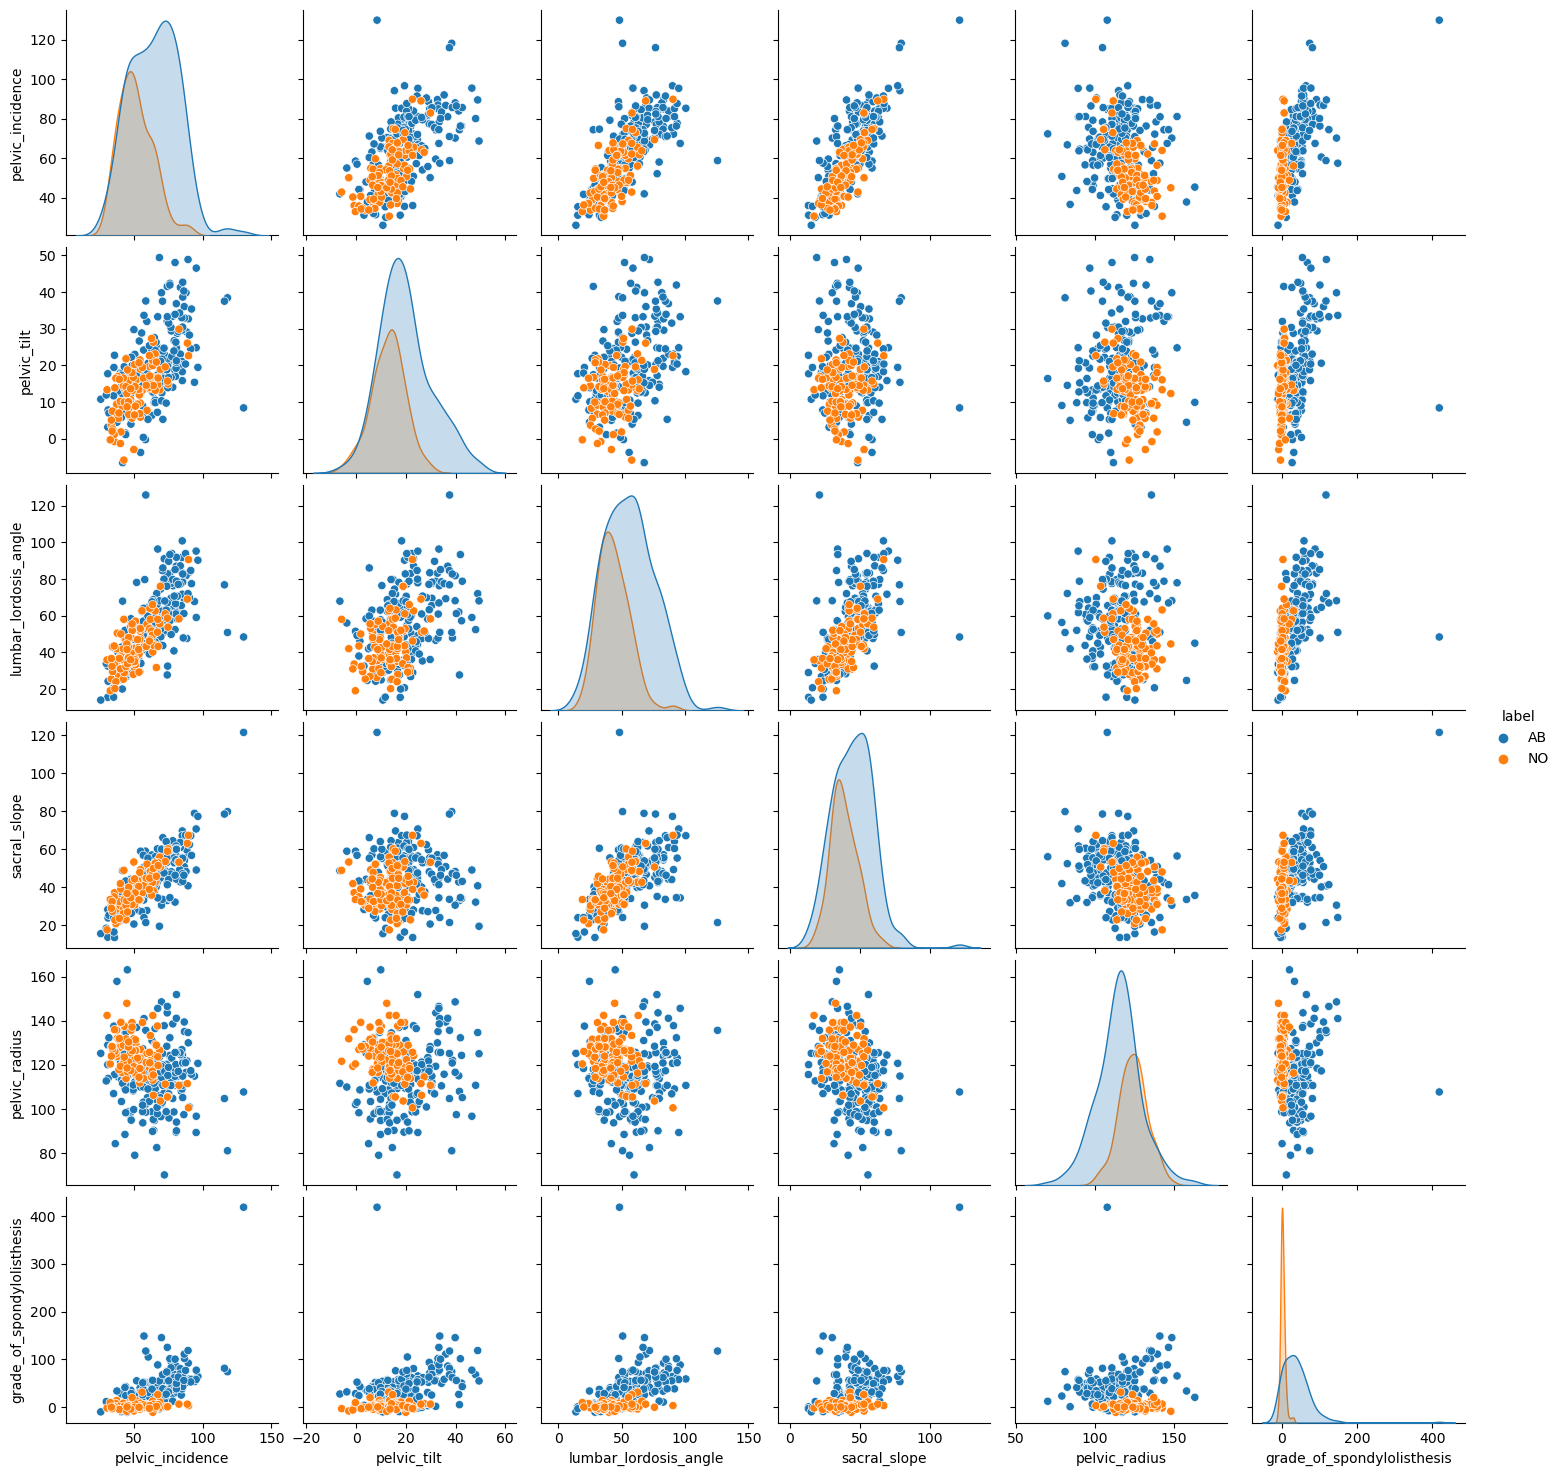

In [9]:
#Plot pair plots
sns.pairplot(df[numerical_columns + ['label']], hue='label')
plt.show()

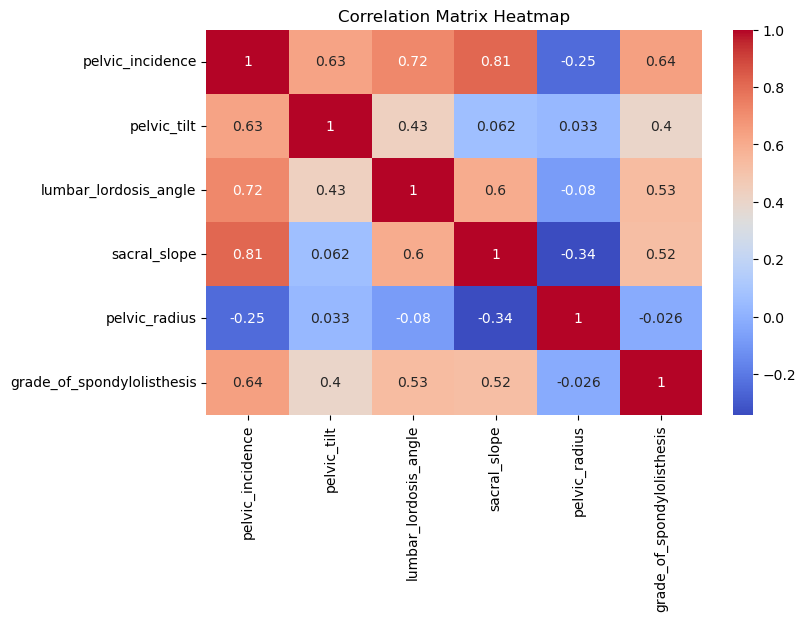

In [10]:
#plot correlation matrix
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Identifying Outliers

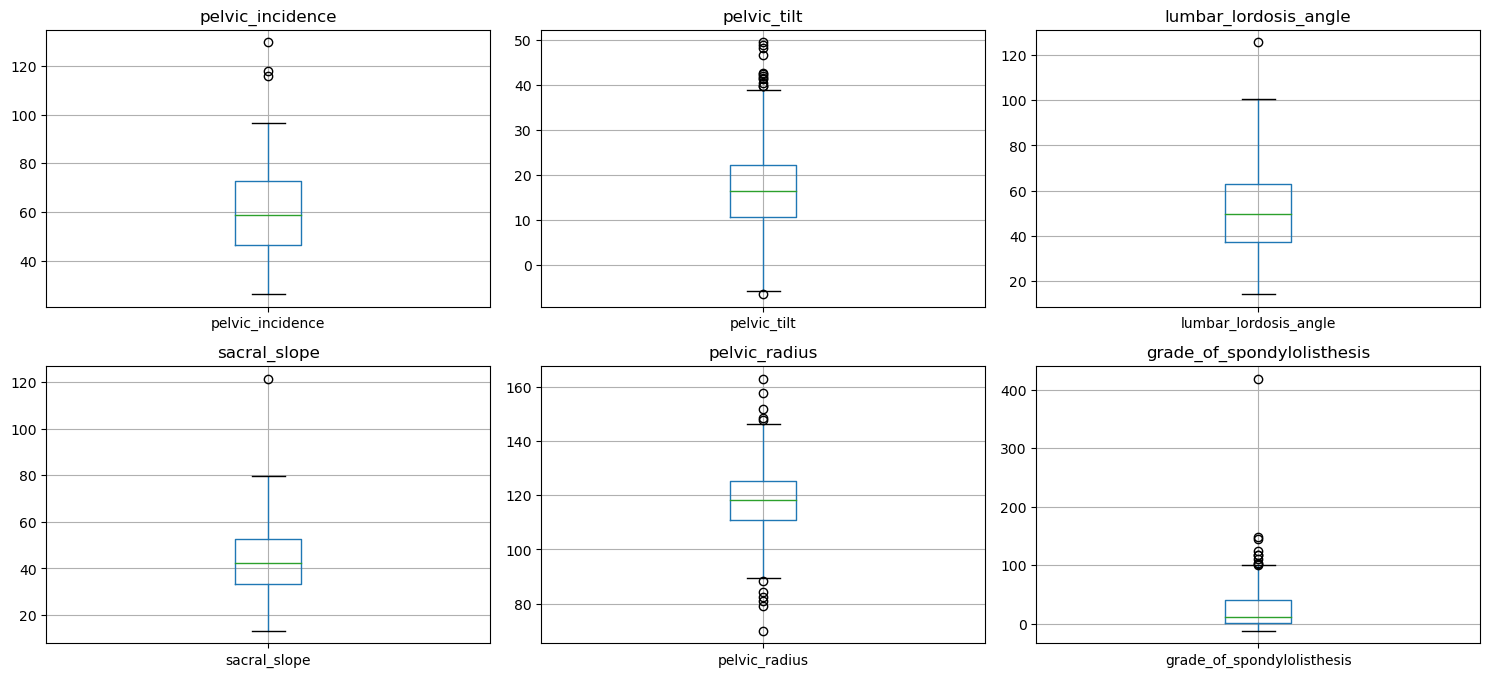

In [11]:
#plot box plots to identify outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
columns=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope', 'pelvic_radius', 
         'grade_of_spondylolisthesis']
for i, column in enumerate(columns):
    plt.subplot(3, 3, i+1)
    df.boxplot(column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [12]:
# Use z-score to identify outliers
from scipy.stats import zscore
threshold = 3
df_without=df.drop(columns=['label'])
# Function to identify outliers in a column
def find_outliers(column):
    z_scores = zscore(column)
    outliers = column[(abs(z_scores) > threshold)]
    return outliers

# Identify outliers for each column and print them
outliers_dict = {}
for column in df_without.columns:
    outliers_dict[column] = find_outliers(df[column])
    print(f"Outliers in {column}:", outliers_dict[column].to_list(), "\n")

Outliers in pelvic_incidence: [129.83, 118.14, 115.92] 

Outliers in pelvic_tilt: [48.07, 48.9, 49.43] 

Outliers in lumbar_lordosis_angle: [125.74] 

Outliers in sacral_slope: [121.43] 

Outliers in pelvic_radius: [163.07, 70.08, 157.85] 

Outliers in grade_of_spondylolisthesis: [145.38, 148.75, 418.54] 



In [13]:
# Example outlier
df[df['sacral_slope']==121.43]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label
115,129.83,8.4,48.38,121.43,107.69,418.54,AB


#### Check for negative values

In [14]:
def find_zero_or_negative_values(df):
    for column in df.columns:
        # Find indices (row numbers) and values where the column has zero or negative values
        condition = df[column] <= 0
        indices = df.index[condition].tolist()
        values = df.loc[condition, column].tolist()
        
        # Check if the list is not empty, indicating the presence of zero or negative values
        if indices:
            print(f"Column '{column}' has zero or negative values at row indices: {indices} with values: {values}")
        else:
            print(f"Column '{column}' has no zero or negative values.")

find_zero_or_negative_values(df_without)

Column 'pelvic_incidence' has no zero or negative values.
Column 'pelvic_tilt' has zero or negative values at row indices: [69, 112, 147, 250, 252, 257, 278, 287] with values: [-0.26, -6.55, -3.76, -0.81, -5.85, -2.97, -1.33, -0.32]
Column 'lumbar_lordosis_angle' has no zero or negative values.
Column 'sacral_slope' has no zero or negative values.
Column 'pelvic_radius' has no zero or negative values.
Column 'grade_of_spondylolisthesis' has zero or negative values at row indices: [0, 2, 7, 10, 16, 19, 23, 24, 26, 29, 37, 40, 43, 44, 45, 47, 48, 54, 58, 213, 214, 215, 216, 220, 221, 223, 229, 230, 233, 235, 239, 240, 242, 243, 245, 250, 252, 257, 259, 263, 264, 266, 270, 273, 277, 278, 289, 292, 294, 296, 300, 302, 303, 304, 305, 306, 307, 309] with values: [-0.25, -3.53, -10.68, -7.83, -0.62, -1.24, -4.99, -3.24, -10.09, -2.01, -0.26, -3.46, -0.8, -2.33, -2.53, -4.5, -1.54, -9.57, -2.92, -0.91, -3.39, -2.01, -1.06, -0.28, -0.63, -0.44, -3.11, -4.08, -2.51, -11.06, -1.86, -6.05, -0.76, 

#### Check if there are inconsistencies in Pelvic_incidence = Pelvic_Tilt + Sacral_slope

In [15]:
def check_pelvic_inconsistencies(df, tolerance):
    differences = df['pelvic_incidence'] - (df['pelvic_tilt'] + df['sacral_slope'])
    epsilon = 1e-10

    # Filter instances where the absolute difference is greater than the specified tolerance plus epsilon
    inconsistencies = df[abs(differences) > (tolerance + epsilon)]
 
    
    if not inconsistencies.empty:
        print("Inconsistencies found in pelvic measurements:")
        print("Differences exceeding tolerance:")
        print(inconsistencies[['pelvic_incidence', 'pelvic_tilt', 'sacral_slope']])
        print("Actual Differences:")
        print(differences.loc[inconsistencies.index])
    else:
        print("No inconsistencies found in pelvic measurements.")

# Call the function with a specified tolerance of 0.01
check_pelvic_inconsistencies(df, tolerance=0.01)

No inconsistencies found in pelvic measurements.


#### Grouping the Grade_of_Spondyloptosis

In [16]:
def convert_to_grade_abs(value):
    abs_value = abs(value)  # Take the absolute value
    if abs_value <= 25:
        return 1  # Grade I
    elif abs_value <= 50:
        return 2  # Grade II
    elif abs_value <= 75:
        return 3  # Grade III
    elif abs_value <= 100:
        return 4  # Grade IV
    else:
        return 5  # Grade V (Spondyloptosis)

# Apply the conversion to the entire column with absolute values
df['spondylolisthesis_grade_abs'] = df['grade_of_spondylolisthesis'].apply(convert_to_grade_abs)


df[['grade_of_spondylolisthesis', 'spondylolisthesis_grade_abs']].head()

,grade_of_spondylolisthesis,spondylolisthesis_grade_abs
0,-0.25,1
1,4.56,1
2,-3.53,1
3,11.21,1
4,7.92,1


#### Finding median of each grade

In [17]:
def convert_to_grade_abs_median(value):
    abs_value = abs(value)  # Take the absolute value

    if abs_value <= 25:
        return df['grade_of_spondylolisthesis'].loc[df['grade_of_spondylolisthesis'] <= 25].median() 
    # Calculate the median of all the values that fall in that range
    elif abs_value <= 50:
        return df['grade_of_spondylolisthesis'].loc[(df['grade_of_spondylolisthesis'] > 25) & 
                                                    (df['grade_of_spondylolisthesis'] <= 50)].median()
    elif abs_value <= 75:
        return df['grade_of_spondylolisthesis'].loc[(df['grade_of_spondylolisthesis'] > 50) &
                                                    (df['grade_of_spondylolisthesis'] <= 75)].median()
    elif abs_value <= 100:
        return df['grade_of_spondylolisthesis'].loc[(df['grade_of_spondylolisthesis'] > 75) & 
                                                    (df['grade_of_spondylolisthesis'] <= 100)].median()
    else:
        return df['grade_of_spondylolisthesis'].loc[df['grade_of_spondylolisthesis'] > 100].median()  

# Apply the conversion to the entire column with absolute values
df['spondylolisthesis_grade_median'] = df['grade_of_spondylolisthesis'].apply(convert_to_grade_abs_median)
df


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,label,spondylolisthesis_grade_abs,spondylolisthesis_grade_median
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1,2.025
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1,2.025
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1,2.025
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1,2.025
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1,2.025
...,...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO,1,2.025
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO,1,2.025
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO,1,2.025
308,45.25,8.69,41.58,36.56,118.55,0.21,NO,1,2.025


#### Calculating PTR, Pelvic Tilt Ratio = Pelvic_tilt/ Pelvic_incidence

In [18]:
import pandas as pd

# Calculate PTR
df["PTR"] = df["pelvic_tilt"] / df["pelvic_incidence"]

# Encode PTR categories
def encode_ptr(ptr_value):
  if ptr_value < 0.5:
    return 1
  elif ptr_value == 0.5:
    return 2
  else:
    return 3

df["ptr_category"] = df["PTR"].apply(encode_ptr)

# Print the modified DataFrame
print(df["ptr_category"].unique())


[1 3]


In [19]:
df['label_numeric']= df['label'].replace({'AB': 0, 'NO': 1})
df['label_numeric'].value_counts()

0    210
1    100
Name: label_numeric, dtype: int64

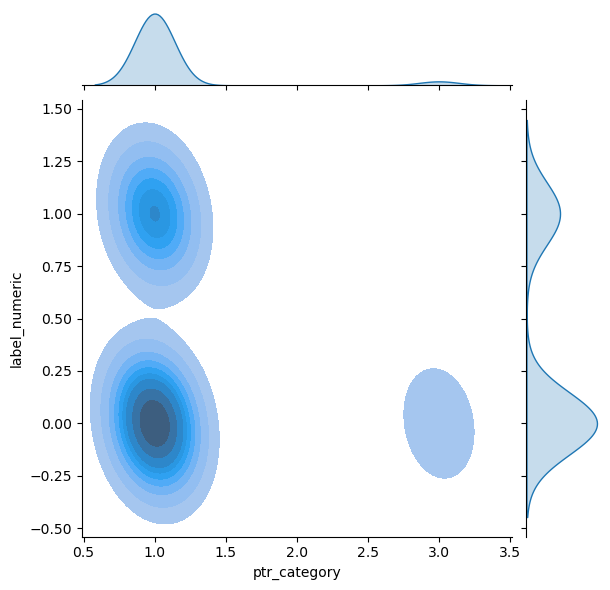

In [20]:
#plot a joint plot to show the distribution of PTR_category againt labels
sns.jointplot(x=df['ptr_category'], y=df['label_numeric'], kind="kde", fill=True)

# Show the plot.
plt.show()

### Feature Engineering

In [21]:
# Use VIF to eliminate Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Unnamed: 0', 'PTR',
                                                                            'spondylolisthesis_grade_abs', 
                                                                            'grade_of_spondylolisthesis', 
                                                                            'label_numeric'] , errors='ignore')


# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_cols.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]

vif_data

,Feature,VIF
0,pelvic_incidence,1.422295e+08
1,pelvic_tilt,1.465564e+07
2,lumbar_lordosis_angle,2.123111e+01
3,sacral_slope,7.279166e+07
4,pelvic_radius,1.981248e+01
5,spondylolisthesis_grade_median,3.094538e+00
6,ptr_category,9.853323e+00


In [22]:
# Removing pelvic_incidence
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Unnamed: 0', 'PTR',
                                                                            'spondylolisthesis_grade_abs', 
                                                                            'pelvic_incidence', 
                                                                            'grade_of_spondylolisthesis',
                                                                            'label_numeric'] , errors='ignore')


# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_cols.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]

vif_data

,Feature,VIF
0,pelvic_tilt,6.840120
1,lumbar_lordosis_angle,21.231022
2,sacral_slope,16.753342
3,pelvic_radius,19.724997
4,spondylolisthesis_grade_median,3.094121
5,ptr_category,9.589950


In [23]:
# Removing lumbar_lordosis_angle
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Unnamed: 0', 'PTR',
                                                                            'spondylolisthesis_grade_abs', 
                                                                            'pelvic_incidence',
                                                                            'lumbar_lordosis_angle', 
                                                                            'grade_of_spondylolisthesis', 
                                                                            'label_numeric'] , errors='ignore')


# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_cols.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]

vif_data

,Feature,VIF
0,pelvic_tilt,6.270373
1,sacral_slope,10.856938
2,pelvic_radius,18.799246
3,spondylolisthesis_grade_median,2.700201
4,ptr_category,9.589661


In [24]:
numerical_columns = ['pelvic_tilt', 'sacral_slope', 'pelvic_radius', 'spondylolisthesis_grade_median', 'ptr_category']

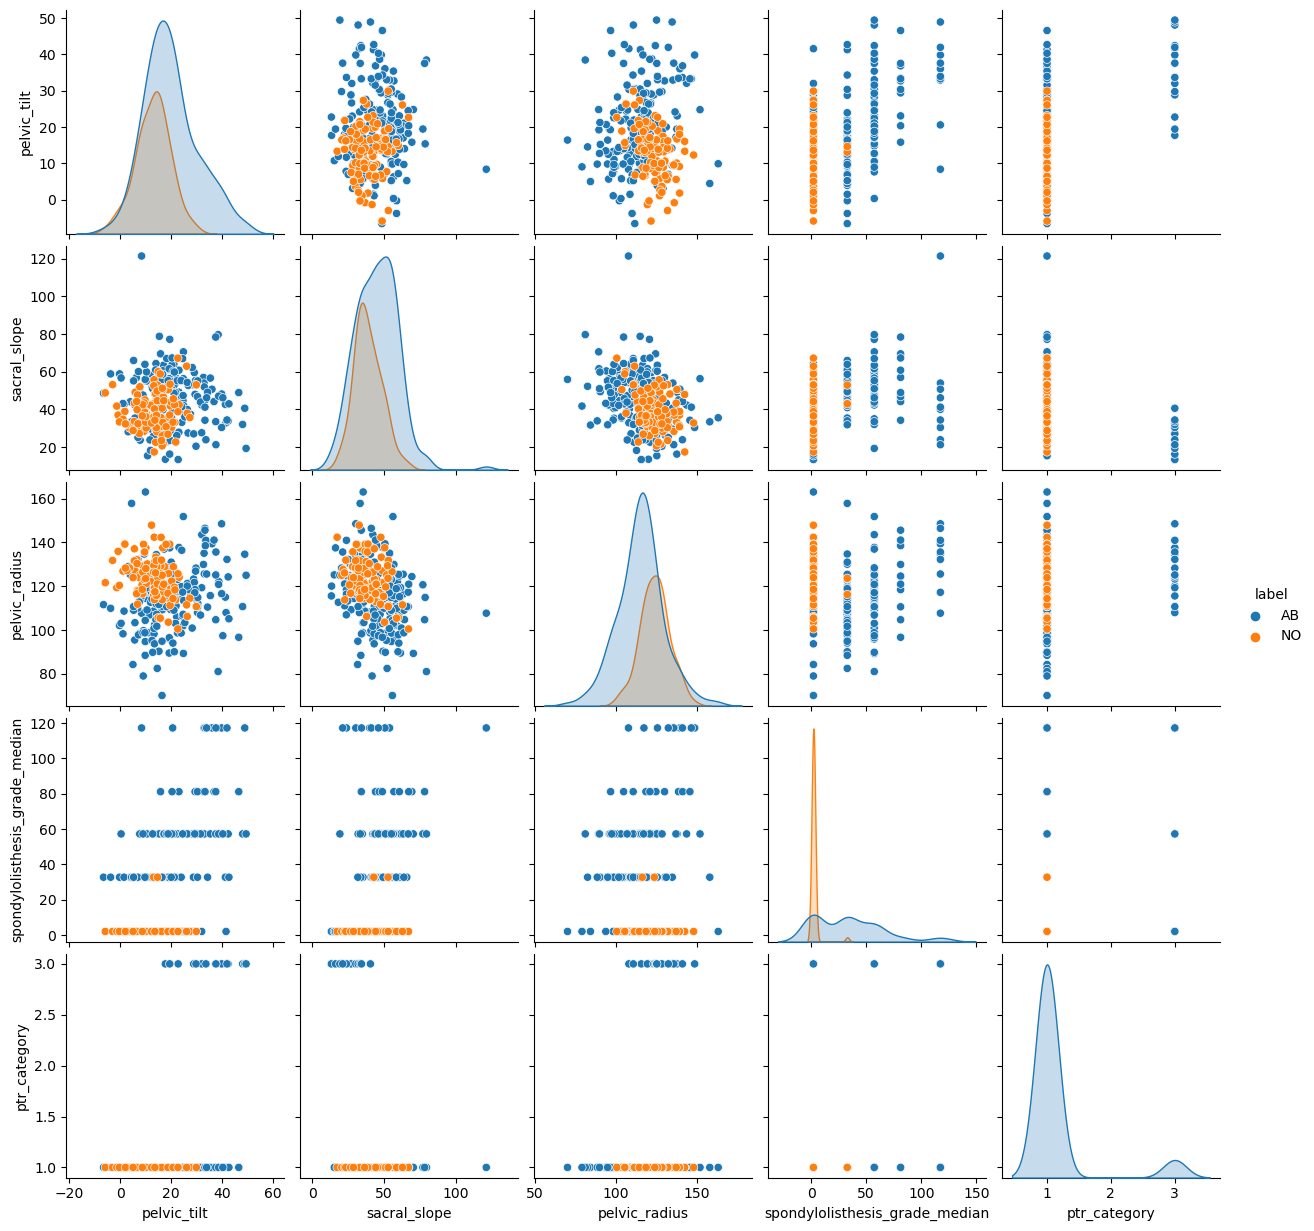

In [25]:
#plot pair plot only for the finalized variables
sns.pairplot(df[numerical_columns + ['label']], hue='label')
plt.show()


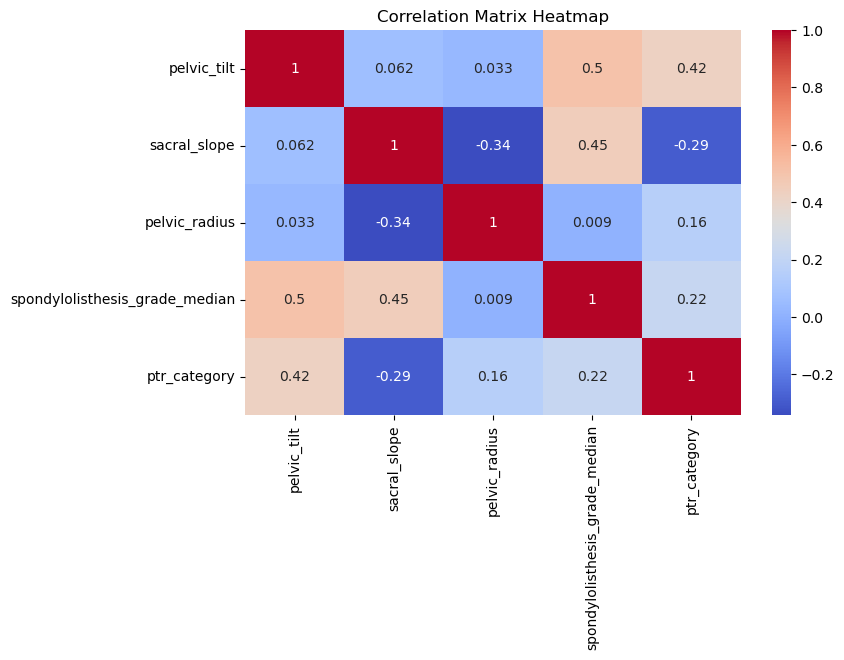

In [26]:
# Plot Correlation matrix for the same
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Reduce dimensions using PCA and visualize

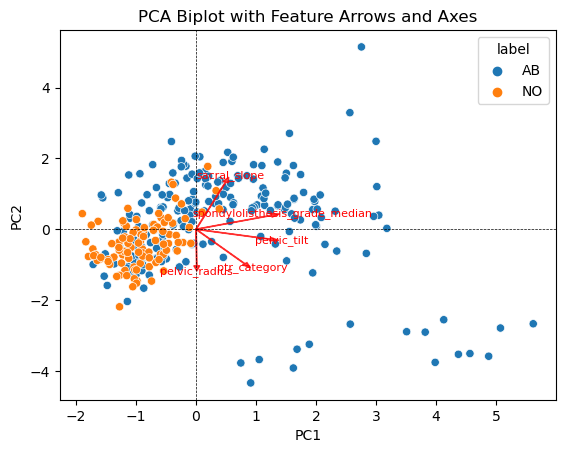

In [27]:
# Reduce the data to two dimensions using PCA for visualization purposes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numerical_columns = ['pelvic_tilt', 'sacral_slope', 'pelvic_radius', 'spondylolisthesis_grade_median', 
                     'ptr_category']
features = numerical_columns

# Obtain and scale the values using Standard Scaler
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Concatenate with target label for plotting
finalDf = pd.concat([principalDf, df[['label']]], axis=1)

# Plot the PCA biplot with arrows representing feature directions
sns.scatterplot(x='PC1', y='PC2', hue='label', data=finalDf)

# Plot arrows for each feature
for i, feature in enumerate(features):
    arrow_length = 2 
    plt.arrow(0, 0, pca.components_[0, i] * arrow_length, pca.components_[1, i] * arrow_length,
              color='r', width=0.01, head_width=0.1, alpha=0.75)
    plt.text(pca.components_[0, i] * arrow_length * 1.15, pca.components_[1, i] * arrow_length * 1.15,
             feature, color='r', ha='center', va='center', fontsize=8)

# Plot lines for PC1 and PC2
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

plt.title('PCA Biplot with Feature Arrows and Axes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [28]:
#save the dataframe and make changes
df_old= df

In [29]:
# drop columns for simplicity
df=df.drop(columns=['label', 'grade_of_spondylolisthesis', 'PTR', 'spondylolisthesis_grade_abs'])

In [30]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondylolisthesis_grade_median,ptr_category,label_numeric
0,63.03,22.55,39.61,40.48,98.67,2.025,1,0
1,39.06,10.06,25.02,29.00,114.41,2.025,1,0
2,68.83,22.22,50.09,46.61,105.99,2.025,1,0
3,69.30,24.65,44.31,44.64,101.87,2.025,1,0
4,49.71,9.65,28.32,40.06,108.17,2.025,1,0
...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,2.025,1,1
306,53.94,20.72,29.22,33.22,114.37,2.025,1,1
307,61.45,22.69,46.17,38.75,125.67,2.025,1,1
308,45.25,8.69,41.58,36.56,118.55,2.025,1,1


### Unsupervised learning- Kmeans

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

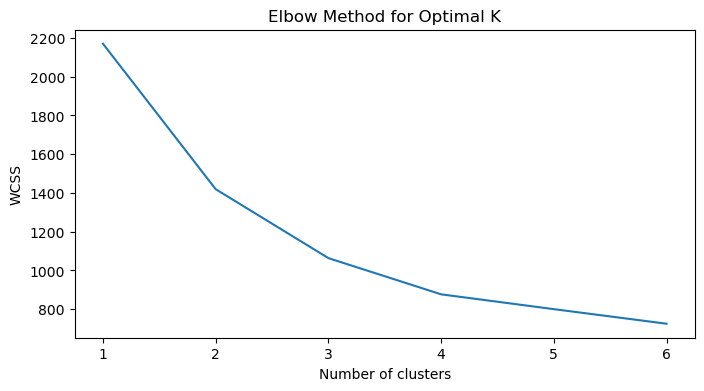

In [31]:
# Find optimal value of k
from sklearn.cluster import KMeans
# Standardize the features
X = df.drop(columns=['label_numeric'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y=df['label_numeric']
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 7):  # testing 1-7 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to find the elbow
plt.figure(figsize=(8,4))
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [32]:
#Run k means
from sklearn.metrics import accuracy_score, classification_report

X_wn = df.drop(columns=['label_numeric', 'pelvic_incidence', 'lumbar_lordosis_angle'], axis=1) #finalized features
scaler = StandardScaler()
X_scaled_w = scaler.fit_transform(X_wn)
pca = PCA(n_components=2)
X_pca_w = pca.fit_transform(X_scaled_w)

optimal_k = 2  # optimal k value from elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca_w)

# Predict the cluster labels
labels = kmeans.labels_
accuracy = accuracy_score(y, labels)
print(accuracy)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.6774193548387096


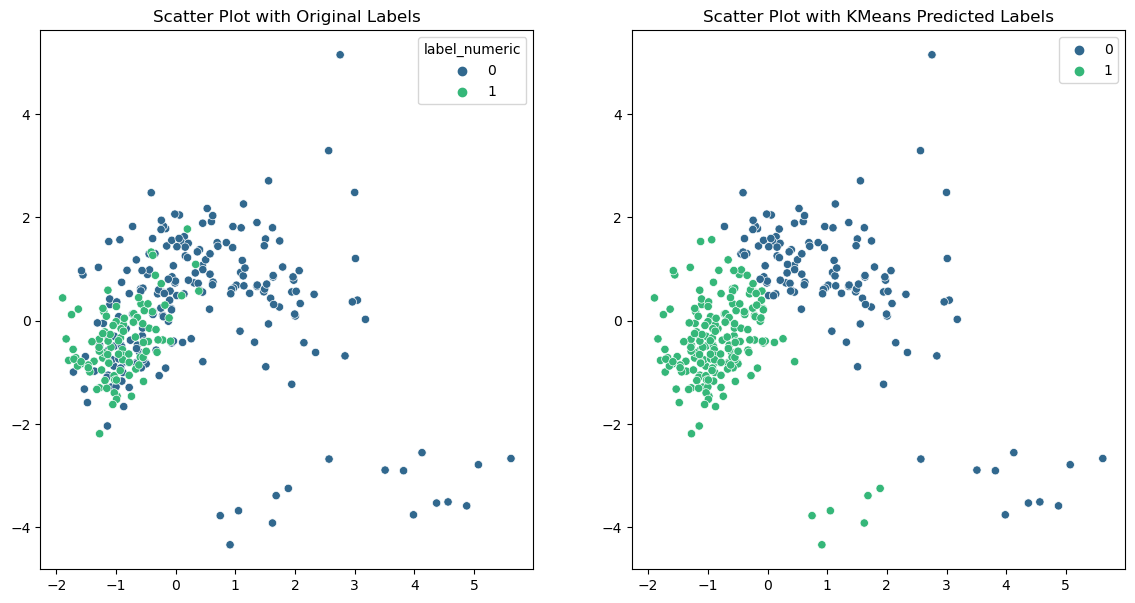

0.6774193548387096


In [33]:
# visulaize the clusters made by k means 

y_kmeans = kmeans.predict(X_pca_w)

# Plot the PCA-reduced data
plt.figure(figsize=(14, 7))

# Original labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca_w[:, 0], y=X_pca_w[:, 1], hue=y, palette='viridis')
plt.title('Scatter Plot with Original Labels')

# KMeans labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca_w[:, 0], y=X_pca_w[:, 1], hue=y_kmeans, palette='viridis')
plt.title('Scatter Plot with KMeans Predicted Labels')

plt.show()
accuracy = accuracy_score(y, y_kmeans)
print(accuracy)

In [34]:
from sklearn.metrics import adjusted_rand_score


# Adjusted Rand Index
ari = adjusted_rand_score(y, kmeans.labels_)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")


Adjusted Rand Index (ARI): 0.118


#### Kernal Kmeans 

In [35]:
#implement kernel kmeans

import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import polynomial_kernel, sigmoid_kernel
from scipy.spatial.distance import pdist, squareform
pca = PCA(n_components=2)
X_scaled = scaler.fit_transform(X_wn)
X_pca = pca.fit_transform(X_scaled)
# RBF (Gaussian) Kernel Function
def rbf_kernel_sigma(X, sigma=None):
    if sigma is None:
        sigma = np.median(pdist(X, 'euclidean'))
    return np.exp(-euclidean_distances(X, X, squared=True) / (2 * (sigma ** 2)))

# Polynomial Kernel Function
def poly_kernel(X, degree=4, coef0=1):
    return polynomial_kernel(X, degree=degree, coef0=coef0)

# Sigmoid Kernel Function
def sig_kernel(X, coef0=1):
    return sigmoid_kernel(X, coef0=coef0)

# Kernel KMeans Algorithm
def kernel_kmeans(X, n_clusters, max_iter=1000, kernel='rbf', **kwargs):
    # Compute the chosen kernel matrix
    if kernel == 'rbf':
        K = rbf_kernel_sigma(X, **kwargs)
    elif kernel == 'poly':
        K = poly_kernel(X, **kwargs)
    elif kernel == 'sigmoid':
        K = sig_kernel(X, **kwargs)
    else:
        raise ValueError("Invalid kernel specified.")

    # Randomly assign clusters
    clusters = np.random.choice(n_clusters, len(X))
    distances = np.zeros((X.shape[0], n_clusters))

    for _ in range(max_iter):
        for j in range(n_clusters):
            mask = clusters == j
            distances[:, j] = np.sum(K[:, mask], axis=1) - np.sum(K[mask][:, mask]) / np.sum(mask)
        
        prev_clusters = clusters
        clusters = np.argmin(distances, axis=1)
        
        if np.all(clusters == prev_clusters):
            break

    return clusters

n_clusters = 2
clusters = kernel_kmeans(X_pca, n_clusters, kernel='rbf') 
clusters_1 = kernel_kmeans(X_pca, n_clusters, kernel='poly')
clusters_2 = kernel_kmeans(X_pca, n_clusters, kernel='sigmoid')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7668\2006536519.py:43: RuntimeWarning: invalid value encountered in scalar divide
  distances[:, j] = np.sum(K[:, mask], axis=1) - np.sum(K[mask][:, mask]) / np.sum(mask)


In [36]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

accuracy = accuracy_score(y, clusters)
print(f"Accuracy rbf: {accuracy:.2f}")
ari = adjusted_rand_score(y, clusters)
print(f"The Adjusted Rand Index rbf is: {ari:.2f}")
score = silhouette_score(X_pca, clusters)
print('Silhouette Score rbf: %.3f' % score)
db_index = davies_bouldin_score(X_pca, clusters)
print('Davies-Bouldin Index rbf: %.3f' % db_index)

# Poly does not create clusters for this dataset
accuracy_1 = accuracy_score(y, clusters_1)
print(f"\nAccuracy poly: {accuracy_1:.2f}")
ari = adjusted_rand_score(y, clusters_1)
print(f"The Adjusted Rand Index poly is: {ari:.2f}")


accuracy_2 = accuracy_score(y, clusters_2)
print(f"\nAccuracy sigmoid: {accuracy_2:.2f}")
ari = adjusted_rand_score(y, clusters_2)
print(f"The Adjusted Rand sigmoid Index is: {ari:.2f}")
score = silhouette_score(X_pca, clusters_2)
print('Silhouette Score sigmoid: %.3f' % score)
db_index = davies_bouldin_score(X_pca, clusters_2)
print('Davies-Bouldin Index sigmoid: %.3f' % db_index)


Accuracy rbf: 0.77
The Adjusted Rand Index rbf is: 0.28
Silhouette Score rbf: 0.379
Davies-Bouldin Index rbf: 1.016

Accuracy poly: 0.32
The Adjusted Rand Index poly is: 0.00

Accuracy sigmoid: 0.74
The Adjusted Rand sigmoid Index is: 0.23
Silhouette Score sigmoid: 0.419
Davies-Bouldin Index sigmoid: 0.979


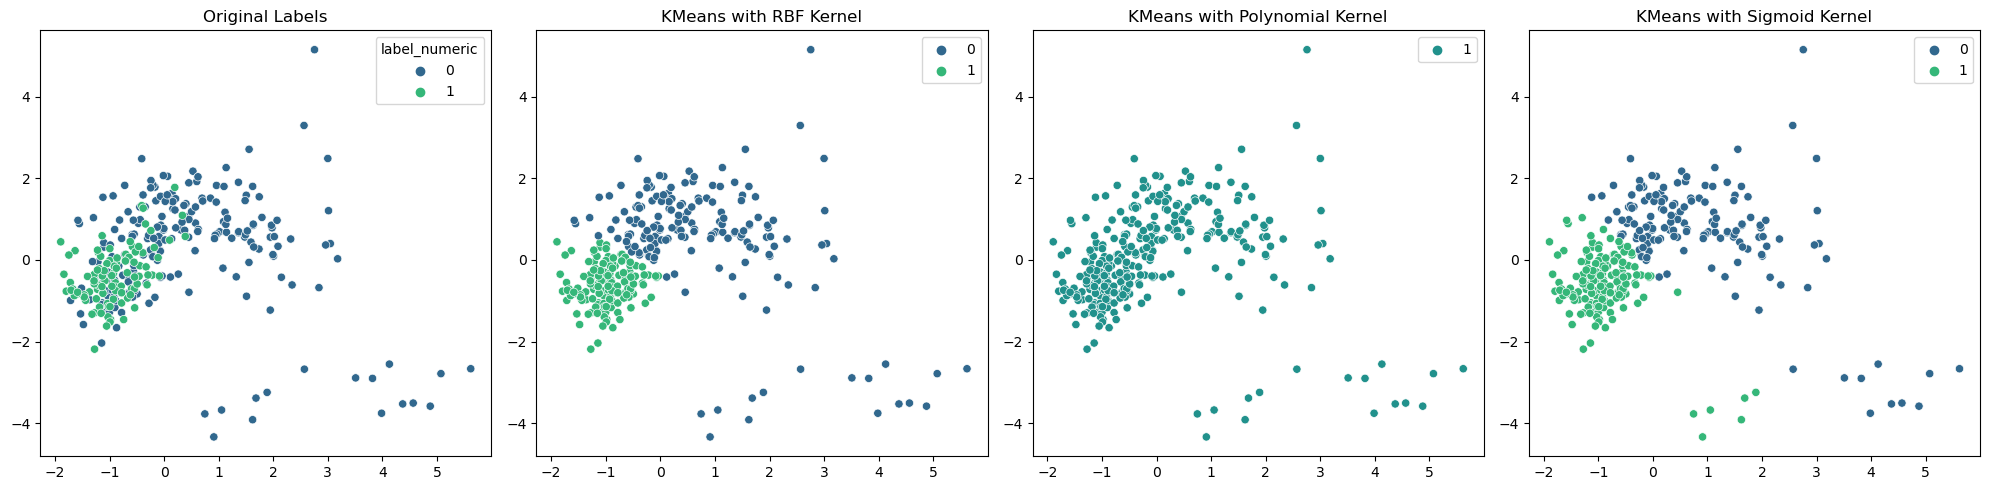

In [37]:
# Plotting
plt.figure(figsize=(20, 5))

# Original labels
plt.subplot(1, 4, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend='full')
plt.title('Original Labels')

# RBF Kernel
plt.subplot(1, 4, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('KMeans with RBF Kernel')

# Polynomial Kernel
plt.subplot(1, 4, 3)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_1, palette='viridis', legend='full')
plt.title('KMeans with Polynomial Kernel')

# Sigmoid Kernel
plt.subplot(1, 4, 4)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_2, palette='viridis', legend='full')
plt.title('KMeans with Sigmoid Kernel')

plt.tight_layout()
plt.show()

#### Gaussian EM 

In [38]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
X_scaled = scaler.fit_transform(X_wn)
X_pca = pca.fit_transform(X_scaled)
# Initialize the Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, random_state=0)

# Fit the model and predict cluster labels
gmm.fit(X_pca)
labels = gmm.predict(X_pca)


# Display the first few rows with cluster labels
print(df.head())


   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic_radius  spondylolisthesis_grade_median  ptr_category  label_numeric  
0          98.67                           2.025             1              0  
1         114.41                           2.025             1              0  
2         105.99                           2.025             1              0  
3         101.87                           2.025             1              0  
4         108.17                           2.025             1              0  


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [39]:
accuracy = accuracy_score(y, labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.45


In [40]:
ari = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: -0.029470244880155354


In [41]:
results = []

# Test GMM with increasing values of max_iter
for max_iter in np.arange(1, 15, 1):  
    gmm = GaussianMixture(n_components=2, max_iter=max_iter, random_state=0)
    gmm.fit(X_scaled)
    bic = gmm.bic(X_scaled)
    aic = gmm.aic(X_scaled)
    results.append({
        'max_iter': max_iter,
        'log_likelihood': gmm.lower_bound_,
        'bic': bic,
        'aic': aic
    })

# Convert the results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Find the number of iterations for the model with the lowest BIC
best_bic_iter = results_df.loc[results_df['bic'].idxmin()]['max_iter']

# Output the DataFrame of results and the best number of iterations based on BIC
results_df, best_bic_iter

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or chec

(    max_iter  log_likelihood         bic         aic
 0          1       -5.612587  546.446493  393.247028
 1          2       -0.502011  207.212822   54.013358
 2          3        0.045140   82.682545  -70.516919
 3          4        0.245995   54.109972  -99.089493
 4          5        0.292080    5.638215 -147.561249
 5          6        0.370260  -39.235920 -192.435385
 6          7        0.442638 -229.904873 -383.104337
 7          8        0.750168 -229.904873 -383.104337
 8          9        0.750168 -229.904873 -383.104337
 9         10        0.750168 -229.904873 -383.104337
 10        11        0.750168 -229.904873 -383.104337
 11        12        0.750168 -229.904873 -383.104337
 12        13        0.750168 -229.904873 -383.104337
 13        14        0.750168 -229.904873 -383.104337,
 7.0)

Gaussian model's performance isn't good thereby not considered

### Supervised Learning- KNN

In [42]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Initialize a list to store results
results = []

# Iterate over different test sizes
for test_size in [0.2, 0.3, 0.4]:
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)
    
    # Iterate over different values of k
    for k in range(1, 11):
        # Create and train the KNN model
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = knn_model.predict(X_test)

        # Evaluate the performance of the model
        accuracy = accuracy_score(y_test, y_pred)

        # Append the results to the list
        results.append({
            'Test Size': test_size,
            'k': k,
            'Accuracy': accuracy
        })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

    Test Size   k  Accuracy
0         0.2   1  0.822581
1         0.2   2  0.758065
2         0.2   3  0.822581
3         0.2   4  0.854839
4         0.2   5  0.838710
5         0.2   6  0.838710
6         0.2   7  0.887097
7         0.2   8  0.822581
8         0.2   9  0.870968
9         0.2  10  0.806452
10        0.3   1  0.795699
11        0.3   2  0.838710
12        0.3   3  0.860215
13        0.3   4  0.849462
14        0.3   5  0.827957
15        0.3   6  0.817204
16        0.3   7  0.806452
17        0.3   8  0.784946
18        0.3   9  0.806452
19        0.3  10  0.784946
20        0.4   1  0.814516
21        0.4   2  0.838710
22        0.4   3  0.814516
23        0.4   4  0.822581
24        0.4   5  0.830645
25        0.4   6  0.814516
26        0.4   7  0.798387
27        0.4   8  0.830645
28        0.4   9  0.798387
29        0.4  10  0.790323


In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Specify different distance metrics for KNN
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Create and train KNN models with different metrics
for metric in distance_metrics:
    knn_model = KNeighborsClassifier(n_neighbors=4, metric=metric)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)

    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with {metric} metric: {accuracy:.2f}')
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion matrix\n', conf_matrix)
    # Print classification report for more detailed evaluation
    print(f'\nClassification Report with {metric} metric:')
    print(classification_report(y_test, y_pred))
    print('='*40)

Accuracy with euclidean metric: 0.85
Confusion matrix
 [[64  5]
 [ 9 15]]

Classification Report with euclidean metric:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        69
           1       0.75      0.62      0.68        24

    accuracy                           0.85        93
   macro avg       0.81      0.78      0.79        93
weighted avg       0.84      0.85      0.84        93

Accuracy with manhattan metric: 0.82
Confusion matrix
 [[64  5]
 [12 12]]

Classification Report with manhattan metric:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        69
           1       0.71      0.50      0.59        24

    accuracy                           0.82        93
   macro avg       0.77      0.71      0.73        93
weighted avg       0.81      0.82      0.81        93

Accuracy with chebyshev metric: 0.81
Confusion matrix
 [[62  7]
 [11 13]]

Classification Report with cheb


Confusion Matrix with euclidean metric:
[[64  5]
 [ 9 15]]

Classification Report with euclidean metric:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        69
           1       0.75      0.62      0.68        24

    accuracy                           0.85        93
   macro avg       0.81      0.78      0.79        93
weighted avg       0.84      0.85      0.84        93

10-fold CV scores mean 0.825108225108225

Confusion Matrix with manhattan metric:
[[64  5]
 [12 12]]

Classification Report with manhattan metric:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        69
           1       0.71      0.50      0.59        24

    accuracy                           0.82        93
   macro avg       0.77      0.71      0.73        93
weighted avg       0.81      0.82      0.81        93

10-fold CV scores mean 0.8069264069264068

Confusion Matrix with chebyshev metric:
[[62  7]
 

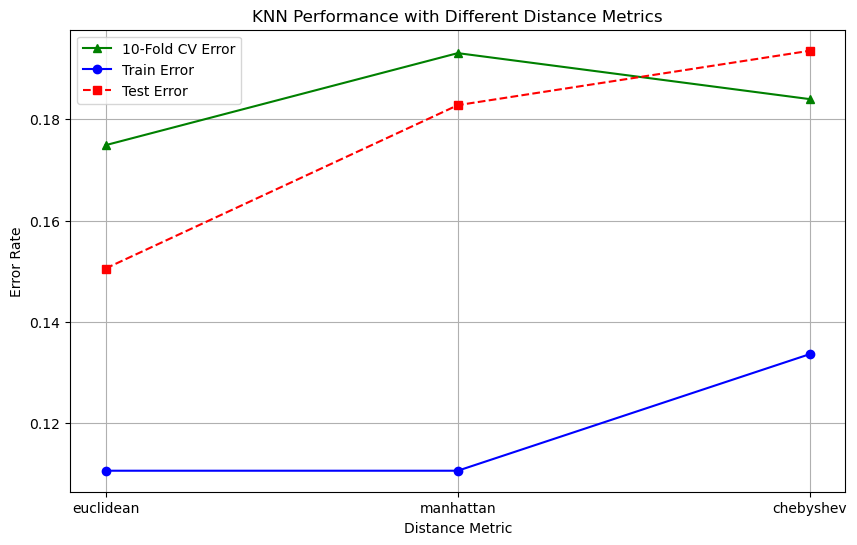

In [44]:

# Specify different distance metrics for KNN
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Initialize lists to store errors
train_errors = []
test_errors = []
cv_errors = []
# Create and train KNN models with different metrics
for metric in distance_metrics:
    knn_model = KNeighborsClassifier(n_neighbors=4, metric=metric)
    knn_model.fit(X_train, y_train)

    # Make predictions on the training set
    y_train_pred = knn_model.predict(X_train)
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))

    # Make predictions on the test set
    y_test_pred = knn_model.predict(X_test)
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f'\nConfusion Matrix with {metric} metric:')
    print(cm)

    # Print classification report for more detailed evaluation
    print(f'\nClassification Report with {metric} metric:')
    print(classification_report(y_test, y_test_pred))
    
    cv_scores = cross_val_score(knn_model, X_train, y_train, cv=10)
    print("10-fold CV scores mean", np.mean(cv_scores))
    cv_errors.append(1 - np.mean(cv_scores))
    print('=' * 40)
    
print("Training errors: ", train_errors)
print("Testing errors: ", test_errors)
print("CV errors: ", cv_errors)

# Plot errors for train and test sets
# Plot cross-validation errors for different distance metrics
plt.figure(figsize=(10, 6))
plt.plot(distance_metrics, cv_errors, marker='^', linestyle='-', color='green', label='10-Fold CV Error')
plt.plot(distance_metrics, train_errors, marker='o', linestyle='-', color='blue', label='Train Error')
plt.plot(distance_metrics, test_errors, marker='s', linestyle='--', color='red', label='Test Error')
plt.title('KNN Performance with Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()

#### SVM

In [45]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0) 
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for more detailed evaluation
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        69
           1       0.66      0.79      0.72        24

    accuracy                           0.84        93
   macro avg       0.79      0.82      0.80        93
weighted avg       0.85      0.84      0.84        93



#### Gaussian NB Classifier

In [46]:
from sklearn.naive_bayes import GaussianNB
# Create and train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(cm)

# Print classification report for more detailed evaluation
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.77

Confusion Matrix:
[[48 21]
 [ 0 24]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        69
           1       0.53      1.00      0.70        24

    accuracy                           0.77        93
   macro avg       0.77      0.85      0.76        93
weighted avg       0.88      0.77      0.79        93

